In [ ]:
# Información original: https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4

In [1]:
# Eliminar advertencias
import warnings
warnings.filterwarnings('ignore')

# Importar librerias
import numpy as np
import pandas as pd

# leer archivo y mostrar datos
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# dimensión del data set
advertising.shape

# información
advertising.info()

# descripción estadistica
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


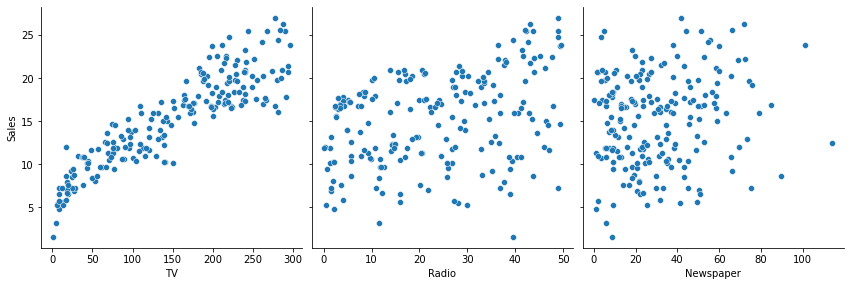

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Plot de cada variable con las ventas
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

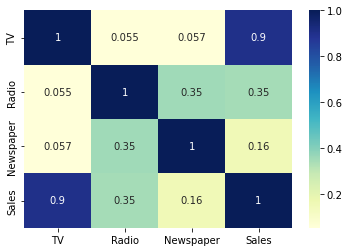

In [6]:
# Usar mapa de calor
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [7]:
# Variables x/y
X = advertising['TV']
y = advertising['Sales']

In [8]:
# Generar conjunto de entrenanmiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# 70-30, 80-20, 75-25

In [9]:
# Observar
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [10]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [11]:
# Importar modelo
import statsmodels.api as sm

# adicionar constante
X_train_sm = sm.add_constant(X_train)

In [12]:
# fiting del modelo
lr = sm.OLS(y_train, X_train_sm).fit()

# Imprimir los parametros
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [13]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.52e-52
Time:                        20:45:56   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ahora veamos con mas detalle estas celdas:

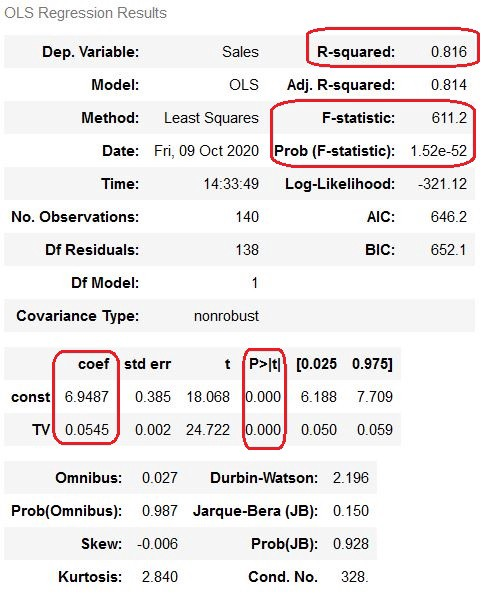

In [14]:
from IPython.display import Image
Image(filename='explicacion.jpeg') 

- El coeficiente de TV es 0.054, y su valor de p es bajo, casi 0. Eso significa que este coeficiente es estadisticamente significativo
- El r cuadrado es 0.816, lo que significa que el 81% de las variación de las ventas pueden ser explicadas con la columna TV
- El F estadistico tiene un valor bajo, casi 0, lo que nos dice que el ajuste del modelo es estadisticamente significativo

# El modelo tiene buena pinta

# Queremos plotear esto: Sales = 6.948 + 0.054 * TV

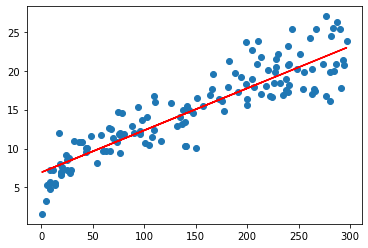

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Una de las formas más basicas de analizar el error:
Error = Valor real de y - valor de y predecido con el modelo

In [16]:
y_train_pred = lr.predict(X_train_sm)

# Calcular el residuo
res = (y_train - y_train_pred)

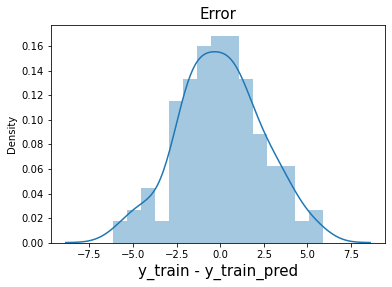

In [17]:
# Mostrar el error
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Como podemos ver el residup tiene una distribución normal con media 0

# Otra validación es plotear los residuos y ver que no siguen patron

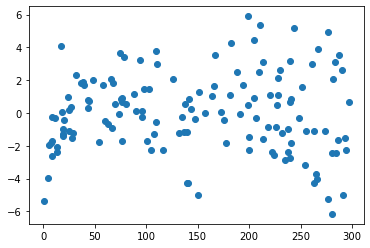

In [18]:
plt.scatter(X_train,res)
plt.show()

# Ahora vamos a validar el modelo con el conjunto de test

In [19]:
# añadir variable independiente
X_test_sm = sm.add_constant(X_test)

# Predecir los valores
y_test_pred = lr.predict(X_test_sm)

# Mostrar primeros resultados
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

# Vamos a calcular el r2

In [20]:
# Importar R2
from sklearn.metrics import r2_score

# Calcular el valor
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245658

- El R² da un valor de = 0.792
- En nuestra etapa de entrenamiento, el R² nos dio = 0.815
- Como la diferencia es menor al 5% se determina que es un buen modelo

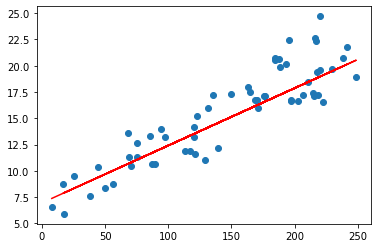

In [21]:
# Grafica con conjunto de testing
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Ahora vamos a probar con el paquete SKLearn

In [22]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [23]:
# Forma
X_train_lm.shape

# Adicionar columna extra
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [24]:
from sklearn.linear_model import LinearRegression

# Crear objeto de regresión lineal
lm = LinearRegression()

# Ajustar el modelo
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [25]:
# Valor de intercepción
print("Intercept :",lm.intercept_)

# Curva
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


# Nuestro modelo nos da: Sales = 6.948 + 0.054 * TV

In [26]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparar los 2 r2
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662
